In [42]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import requests
import json
import time
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/aac_intakes_outcomes.csv')

In [3]:
df.outcome_type.unique()

array(['Return to Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', nan, 'Relocate'], dtype=object)

In [4]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome', 'age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month', 'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour', 'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear', 'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color', 'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake', 'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)', 'age_upon_intake_age_group', 'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter', 'time_in_shelter_days'], dtype='object')

In [5]:
df.outcome_type.value_counts(dropna=False)

Adoption           33594
Transfer           23799
Return to Owner    14791
Euthanasia          6244
Died                 690
Disposal             304
Rto-Adopt            179
Missing               46
Relocate              15
NaN                   10
Name: outcome_type, dtype: int64

In [6]:
df[df.outcome_type=='Transfer'].head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2004,4,2014-04,10 years,A047759,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
11,14 years,A197810,2000-01-21 00:00:00,Partner,Transfer,Spayed Female,5110,14.0,"(12.5, 15.0]",2014-12-22 15:23:00,12,2014,2014-12,Monday,15,1.0,2000,1,2014-12,14 years,A197810,Cat,American Shorthair Mix,Brown Tabby/White,4616 E Cesar Chavez in Austin (TX),Normal,Stray,Spayed Female,1,5110,14.0,"(12.5, 15.0]",2014-12-08 12:30:00,12,2014,2014-12,Monday,12,1.0,14 days 02:53:00.000000000,14.120139
28,15 years,A238870,2001-05-24 00:00:00,Partner,Transfer,Neutered Male,5475,15.0,"(12.5, 15.0]",2016-06-17 12:37:00,6,2016,2016-06,Friday,12,1.0,2001,5,2016-06,15 years,A238870,Dog,Rat Terrier Mix,Gray/White,8411 Ganttcrest Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2016-06-09 16:22:00,6,2016,2016-06,Thursday,16,1.0,7 days 20:15:00.000000000,7.843750
30,15 years,A245945,2000-05-23 00:00:00,Partner,Transfer,Neutered Male,5475,15.0,"(12.5, 15.0]",2015-05-25 11:49:00,5,2015,2015-05,Monday,11,1.0,2000,5,2015-05,15 years,A245945,Dog,Labrador Retriever Mix,Tan,7403 Blessing Ave in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2015-05-20 22:34:00,5,2015,2015-05,Wednesday,22,1.0,4 days 13:15:00.000000000,4.552083
41,14 years,A260631,2000-04-20 00:00:00,Partner,Transfer,Neutered Male,5110,14.0,"(12.5, 15.0]",2014-10-20 13:50:00,10,2014,2014-10,Monday,13,1.0,2000,4,2014-10,14 years,A260631,Cat,Domestic Longhair Mix,Black/White,600 Barwood Place in Austin (TX),Normal,Stray,Neutered Male,1,5110,14.0,"(12.5, 15.0]",2014-10-16 18:17:00,10,2014,2014-10,Thursday,18,1.0,3 days 19:33:00.000000000,3.814583


In [7]:
len(set([1,1,1,1,1]))

1

In [8]:
df.rename(columns={'age_upon_intake_(days)': 'age_upon_intake_days', 'age_upon_intake_(years)': 'age_upon_intake_tears'}, inplace=True)

In [9]:
print(len(df),len(set(df.animal_id_intake)), len(set(df.animal_id_outcome)))

79672 71961 71961


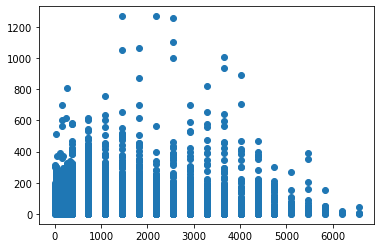

In [10]:
plt.scatter(df[df.outcome_type=='Adoption'].age_upon_intake_days, df[df.outcome_type=='Adoption'].time_in_shelter_days)

In [11]:
df[df.outcome_type=='Adoption'].time_in_shelter_days.describe()

count    33594.000000
mean        29.460366
std         52.144263
min          0.000694
25%          4.961806
50%         10.225000
75%         36.210417
max       1268.975000
Name: time_in_shelter_days, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe1f46c7b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe1f4742c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe1f473a550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe1f47496d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe1f4749bd0>],
 'means': []}

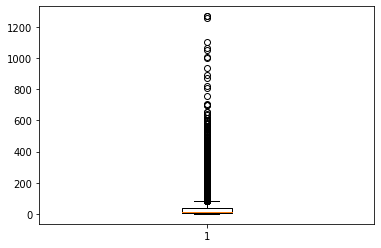

In [12]:
plt.boxplot(df[df.outcome_type=='Adoption'].time_in_shelter_days)

In [13]:
df.color.value_counts()

Black/White           8270
Black                 6673
Brown Tabby           4471
Brown                 3598
White                 2835
                      ... 
White/Calico Point       1
Lynx Point/Blue          1
Blue Tabby/Tan           1
Brown/Black Tabby        1
Cream/Cream              1
Name: color, Length: 529, dtype: int64

In [14]:
df.loc[0, 'color'].split('/')

['Yellow', 'White']

In [15]:
#color split loop. 
animal_dict={}

for animal in df.index:
    color_dict={}
    color_list= df.loc[animal, 'color'].split('/')
    color_dict['color1']=color_list[0]
    color_dict['has_second_color']=len(color_list)-1
    if color_dict['has_second_color']:
        color_dict['color2']=color_list[-1]
    animal_dict[animal]=color_dict
len(animal_dict)==len(df)

True

In [16]:
to_join = pd.DataFrame.from_dict(animal_dict, orient='index')

In [17]:
df = df.join(to_join, how='left')

In [18]:
df = df[df.outcome_type=='Adoption']

In [19]:
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2
12,16 years,A200922,1997-10-03 00:00:00,Foster,Adoption,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,Friday,9,1.0,1997,10,2013-11,16 years,A200922,Dog,Dachshund Mix,Black/Tan,Austin (TX),Normal,Owner Surrender,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,Black,1,Tan
14,17 years,A210457,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,17.0,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,Friday,12,1.0,1999,6,2016-10,17 years,A210457,Dog,Chihuahua Shorthair,Tan/Black,4424 S Mopac #412 in Austin (TX),Aged,Public Assist,Neutered Male,1,6205,17.0,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,Tan,1,Black
22,15 years,A226069,2000-06-17 00:00:00,Foster,Adoption,Neutered Male,5475,15.0,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,Thursday,15,1.0,2000,6,2015-10,15 years,A226069,Dog,Labrador Retriever/Beagle,Sable/White,Wheless Ln And Berkman Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,1.0,23 days 02:31:00.000000000,23.104861,Sable,1,White
32,15 years,A249087,2001-01-02 00:00:00,Foster,Adoption,Spayed Female,5475,15.0,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,Tuesday,10,1.0,2001,1,2016-11,15 years,A249087,Dog,German Shepherd Mix,Black/Brown,E 6Th St And Pedernales in Austin (TX),Normal,Stray,Spayed Female,1,5475,15.0,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,1.0,89 days 20:32:00.000000000,89.855556,Black,1,Brown
48,11 years,A274546,2002-05-25 00:00:00,NaN,Adoption,Spayed Female,4015,11.0,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,Saturday,12,1.0,2002,5,2013-11,11 years,A274546,Dog,Pointer Mix,Tricolor,Manchaca And Slaughter in Austin (TX),Normal,Stray,Spayed Female,1,4015,11.0,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,1.0,2 days 18:08:00.000000000,2.755556,Tricolor,0,NaN


In [20]:
df.sex_upon_outcome.value_counts()

Neutered Male    16188
Spayed Female    15925
Intact Female      762
Intact Male        650
Unknown             69
Name: sex_upon_outcome, dtype: int64

In [21]:
df.sex_upon_intake.value_counts()

Intact Male      12406
Intact Female    12133
Spayed Female     4554
Neutered Male     4432
Unknown             69
Name: sex_upon_intake, dtype: int64

In [22]:
df.animal_type.value_counts()

Dog      20581
Cat      12675
Other      223
Bird       115
Name: animal_type, dtype: int64

In [23]:
df=df[(df.animal_type=='Dog')|(df.animal_type=='Cat')]

In [24]:
df['is_dog']=np.where(df.animal_type=='Dog', 1, 0)

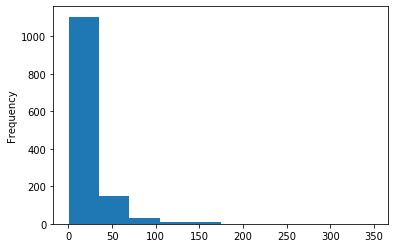

In [25]:
df[(df.sex_upon_outcome=='Intact Male')|(df.sex_upon_outcome=='Intact Female')].time_in_shelter_days.plot(kind='hist')

In [26]:
df.color1.unique()

array(['Black', 'Tan', 'Sable', 'Tricolor', 'Black Smoke', 'Brown',
       'Brown Tabby', 'Orange Tabby', 'Lilac Point', 'Tortie', 'Blue',
       'Red', 'White', 'Flame Point', 'Calico', 'Blue Tick', 'Chocolate',
       'Seal Point', 'Black Tabby', 'Brown Brindle', 'Black Brindle',
       'Blue Cream', 'Cream', 'Buff', 'Gold', 'Blue Tabby', 'Torbie',
       'Calico Point', 'Gray', 'Blue Merle', 'Lynx Point', 'Tortie Point',
       'Fawn', 'Black Tiger', 'Red Tick', 'Yellow', 'Brown Merle',
       'Blue Tiger', 'Yellow Brindle', 'Apricot', 'Blue Point',
       'Cream Tabby', 'Silver', 'Red Merle', 'Gray Tabby', 'Brown Tiger',
       'Chocolate Point', 'Silver Tabby', 'Liver', 'Ruddy', 'Agouti',
       'Orange', 'Liver Tick', 'Blue Smoke', 'Silver Lynx Point'],
      dtype=object)

In [27]:
df.sex_upon_outcome.value_counts()

Neutered Male    16105
Spayed Female    15848
Intact Female      724
Intact Male        578
Unknown              1
Name: sex_upon_outcome, dtype: int64

In [28]:
df.drop(df[df.sex_upon_outcome=='Unknown'].index,axis= 0, inplace=True)

In [29]:
df.sex_upon_outcome.value_counts()

Neutered Male    16105
Spayed Female    15848
Intact Female      724
Intact Male        578
Name: sex_upon_outcome, dtype: int64

In [30]:
animal_dict={}
for animal in df.index:
    gender_dict={}
    gender_list= df.loc[animal, 'sex_upon_outcome'].split()
    gender_dict['is_male']= int(gender_list[-1]=='Male')
    gender_dict['is_fixed']= int(gender_list[0]!='Intact')
    animal_dict[animal]=gender_dict
if len(animal_dict)==len(df):
    df = df.join(pd.DataFrame.from_dict(animal_dict, orient='index'), how='left')
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome', 'age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month', 'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour', 'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear', 'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color', 'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake', 'count', 'age_upon_intake_days', 'age_upon_intake_tears', 'age_upon_intake_age_group', 'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter', 'time_in_shelter_days', 'color1', 'has_second_color', 'color2', 'is_dog', 'is_male', 'is_fixed'], dtype='object')

In [31]:
df.intake_condition.value_counts()

Normal      31188
Injured       957
Sick          486
Nursing       484
Aged           65
Other          37
Pregnant       21
Feral          17
Name: intake_condition, dtype: int64

In [32]:
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed
12,16 years,A200922,1997-10-03 00:00:00,Foster,Adoption,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,Friday,9,1.0,1997,10,2013-11,16 years,A200922,Dog,Dachshund Mix,Black/Tan,Austin (TX),Normal,Owner Surrender,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,Black,1,Tan,1,1,1
14,17 years,A210457,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,17.0,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,Friday,12,1.0,1999,6,2016-10,17 years,A210457,Dog,Chihuahua Shorthair,Tan/Black,4424 S Mopac #412 in Austin (TX),Aged,Public Assist,Neutered Male,1,6205,17.0,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,Tan,1,Black,1,1,1
22,15 years,A226069,2000-06-17 00:00:00,Foster,Adoption,Neutered Male,5475,15.0,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,Thursday,15,1.0,2000,6,2015-10,15 years,A226069,Dog,Labrador Retriever/Beagle,Sable/White,Wheless Ln And Berkman Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,1.0,23 days 02:31:00.000000000,23.104861,Sable,1,White,1,1,1
32,15 years,A249087,2001-01-02 00:00:00,Foster,Adoption,Spayed Female,5475,15.0,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,Tuesday,10,1.0,2001,1,2016-11,15 years,A249087,Dog,German Shepherd Mix,Black/Brown,E 6Th St And Pedernales in Austin (TX),Normal,Stray,Spayed Female,1,5475,15.0,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,1.0,89 days 20:32:00.000000000,89.855556,Black,1,Brown,1,0,1
48,11 years,A274546,2002-05-25 00:00:00,NaN,Adoption,Spayed Female,4015,11.0,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,Saturday,12,1.0,2002,5,2013-11,11 years,A274546,Dog,Pointer Mix,Tricolor,Manchaca And Slaughter in Austin (TX),Normal,Stray,Spayed Female,1,4015,11.0,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,1.0,2 days 18:08:00.000000000,2.755556,Tricolor,0,NaN,1,0,1


In [33]:
city_dict= {}
for animal in df.index:
    string=df.loc[animal, 'found_location']
    if len(string.split())>3:
        location_list = string.split(' in ')[-1]
        city_dict[animal]=' '.join(location_list.split()[:-1])
    else:
        city_dict[animal]=' '.join(string.split()[:-1])
if len(city_dict)==len(df):
    to_join=pd.DataFrame.from_dict(city_dict, orient='index')
to_join.head()

,0
12,Austin
14,Austin
22,Austin
32,Austin
48,Austin


In [34]:
to_join.rename(columns={0:'found_city'}, inplace=True)

In [35]:
df= df.join(to_join, how='left')

In [36]:
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed,found_city
12,16 years,A200922,1997-10-03 00:00:00,Foster,Adoption,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,Friday,9,1.0,1997,10,2013-11,16 years,A200922,Dog,Dachshund Mix,Black/Tan,Austin (TX),Normal,Owner Surrender,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,Black,1,Tan,1,1,1,Austin
14,17 years,A210457,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,17.0,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,Friday,12,1.0,1999,6,2016-10,17 years,A210457,Dog,Chihuahua Shorthair,Tan/Black,4424 S Mopac #412 in Austin (TX),Aged,Public Assist,Neutered Male,1,6205,17.0,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,Tan,1,Black,1,1,1,Austin
22,15 years,A226069,2000-06-17 00:00:00,Foster,Adoption,Neutered Male,5475,15.0,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,Thursday,15,1.0,2000,6,2015-10,15 years,A226069,Dog,Labrador Retriever/Beagle,Sable/White,Wheless Ln And Berkman Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,1.0,23 days 02:31:00.000000000,23.104861,Sable,1,White,1,1,1,Austin
32,15 years,A249087,2001-01-02 00:00:00,Foster,Adoption,Spayed Female,5475,15.0,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,Tuesday,10,1.0,2001,1,2016-11,15 years,A249087,Dog,German Shepherd Mix,Black/Brown,E 6Th St And Pedernales in Austin (TX),Normal,Stray,Spayed Female,1,5475,15.0,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,1.0,89 days 20:32:00.000000000,89.855556,Black,1,Brown,1,0,1,Austin
48,11 years,A274546,2002-05-25 00:00:00,NaN,Adoption,Spayed Female,4015,11.0,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,Saturday,12,1.0,2002,5,2013-11,11 years,A274546,Dog,Pointer Mix,Tricolor,Manchaca And Slaughter in Austin (TX),Normal,Stray,Spayed Female,1,4015,11.0,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,1.0,2 days 18:08:00.000000000,2.755556,Tricolor,0,NaN,1,0,1,Austin


In [39]:
for name in df.found_city.unique():
    print(name)

Austin
Travis
Pflugerville
Manor
Lago Vista
Outside
Del Valle
Lakeway
Williamson
Hays
Round Rock
Webberville
Bastrop
Cedar Park
Jonestown
Burnet
Leander
Creedmoor
West Lake Hills
Bee Cave
Mustang Ridge
Sunset Valley
Point Venture
Caldwell
Blanco


In [62]:
df.animal_id_intake.nunique()

30365

In [61]:
len(df)

33255

In [67]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome', 'age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month', 'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour', 'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear', 'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color', 'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake', 'count', 'age_upon_intake_days', 'age_upon_intake_tears', 'age_upon_intake_age_group', 'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter', 'time_in_shelter_days', 'color1', 'has_second_color', 'color2', 'is_dog', 'is_male', 'is_fixed', 'found_city', 'found_lat', 'found_lon'], dtype='object')

In [43]:

test={}
for name in df.found_city.unique():
    if name != 'Outside':
        try:
            time.sleep(1)
            query= "+".join(name.split())+"+TX"
            response = requests.get('https://nominatim.openstreetmap.org/search?q='+query+'&format=jsonv2')
            payload = response.json()
            test[name]={'lat':payload[0]['lat'],'lon':payload[0]['lon']}
        except IndexError:
            test[name]={'lat':None, 'lon':None}
print(test)

{'Austin': {'lat': '30.2711286', 'lon': '-97.7436995'}, 'Travis': {'lat': '30.2878569', 'lon': '-97.7561392'}, 'Pflugerville': {'lat': '30.4393696', 'lon': '-97.6200043'}, 'Manor': {'lat': '30.3407629', 'lon': '-97.5569456'}, 'Lago Vista': {'lat': '30.4601975', 'lon': '-97.9883477'}, 'Del Valle': {'lat': '23.2699265', 'lon': '-106.3894398'}, 'Lakeway': {'lat': '30.3644888', 'lon': '-97.9875325'}, 'Williamson': {'lat': '30.6580927', 'lon': '-97.6041649'}, 'Hays': {'lat': '30.0447901', 'lon': '-98.0393127'}, 'Round Rock': {'lat': '30.508235', 'lon': '-97.6788934'}, 'Webberville': {'lat': '30.231045', 'lon': '-97.5166653'}, 'Bastrop': {'lat': '30.0900753', 'lon': '-97.3127179'}, 'Cedar Park': {'lat': '30.5217116', 'lon': '-97.827833'}, 'Jonestown': {'lat': '30.4954748', 'lon': '-97.9233468'}, 'Burnet': {'lat': '30.7763939', 'lon': '-98.1700016'}, 'Leander': {'lat': '30.5586046', 'lon': '-97.8444364'}, 'Creedmoor': {'lat': '30.0899368', 'lon': '-97.7338917'}, 'West Lake Hills': {'lat': '30

In [68]:
df.animal_type.unique()

array(['Dog', 'Cat'], dtype=object)

In [75]:
for location in test:
    test[location]['found_count'] = df.found_city.value_counts()[location]
    if location in df[df.animal_type=='Cat'].found_city.value_counts().index:
        test[location]['found_cats']= df[df.animal_type=='Cat'].found_city.value_counts()[location] 
    else: 
        test[location]['found_cats']= 0
    if location in df[df.animal_type=='Dog'].found_city.value_counts().index:    
        test[location]['found_dogs']= df[df.animal_type=='Dog'].found_city.value_counts()[location] 
    else:
        test[location]['found_dogs']= 0

In [74]:
df[df.animal_type=='Cat'].found_city.value_counts().index


Index(['Austin', 'Travis', 'Del Valle', 'Manor', 'Pflugerville', 'Outside', 'Leander', 'Lago Vista', 'Bastrop', 'Round Rock', 'Lakeway', 'Cedar Park', 'Creedmoor', 'Jonestown', 'Hays', 'Bee Cave', 'Mustang Ridge', 'Williamson', 'Webberville', 'Sunset Valley', 'Burnet', 'West Lake Hills'], dtype='object')

In [57]:
df['found_lat'] =df.found_city.map(lambda x: float(test[x]['lat']) if x != 'Outside' else None)
df['found_lon'] =df.found_city.map(lambda x: float(test[x]['lon']) if x != 'Outside' else None)


In [59]:
import plotly.express as px

In [77]:
city_df= pd.DataFrame.from_dict(test, orient='index')

In [82]:
city_df = city_df.applymap(lambda x: float(x))

In [83]:
fig = px.scatter_mapbox(city_df, lat= "lat", lon="lon", hover_name=city_df.index, hover_data=['found_count','found_cats', 'found_dogs'])
fig.update_layout(mapbox_style="open-street-map")
fig.show()